<a href="https://colab.research.google.com/github/Alan240124/Alan/blob/main/Ativ_Dataloader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
from glob import glob
from torch.utils.data import Dataset, DataLoader, Subset
from tqdm import tqdm
import albumentations as A
from albumentations.pytorch import ToTensorV2

# arquivo data.py
class Data(Dataset):
    def __init__(self, image_dir: str, split: str, transform=None) -> None:
        # criar seu construtor

    def __len__(self) -> int:
        # retornar a quantidade de dados

    def __getitem__(self, idx: int) -> tuple:
        # retornar image/labels/boox/mask...

class Dataloader:
    def __init__(self, batch_size: int, shuffle: bool, size: int, subset: int = 0, description: bool = False) -> None:
        # construtor do dataloader

    def compose(self):
        # retornar o compose

    def get_dataloader(self, split: str) -> DataLoader:
        # retornar o dataloader baseado no split

    # def get_train_dataloader(self) -> DataLoader: return self.get_dataloader('train')
    # def get_val_dataloader(self) -> DataLoader: return self.get_dataloader('val')
    # def get_test_dataloader(self) -> DataLoader: return self.get_dataloader('test')

  # arquivo main.py
if __name__ == '__main__':
    dataloader = SGHIST.Dataloader(batch_size=2, size=512, shuffle=True, description=True)

    train_dataloader = dataloader.get_train_dataloader()
    # val_dataloader = dataloader.get_val_dataloader()
    # test_dataloader = dataloader.get_test_dataloader()

    EPOCHS = 10
    for epoch in range(0, EPOCHS):
        for image, mask in train_dataloader:
            image = image.detach().cpu().numpy()[0].transpose(1, 2, 0)
            mask = mask.detach().cpu().numpy()[0]
            cv2.imshow('image', image)
            cv2.imshow('mask', mask)
            if cv2.waitKey(1) == ord('q'):
                break





In [55]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
import os

file_path = '/content/drive/MyDrive/DataSet_coracao/masks/image.0006.jpg'
if not os.path.exists(file_path):
    print("Arquivo não encontrado:", file_path)
else:
    print("Arquivo encontrado:", file_path)


Arquivo não encontrado: /content/drive/MyDrive/DataSet_coracao/masks/image.0006.jpg


Pastas 'images' e 'masks' verificadas/criadas com sucesso.


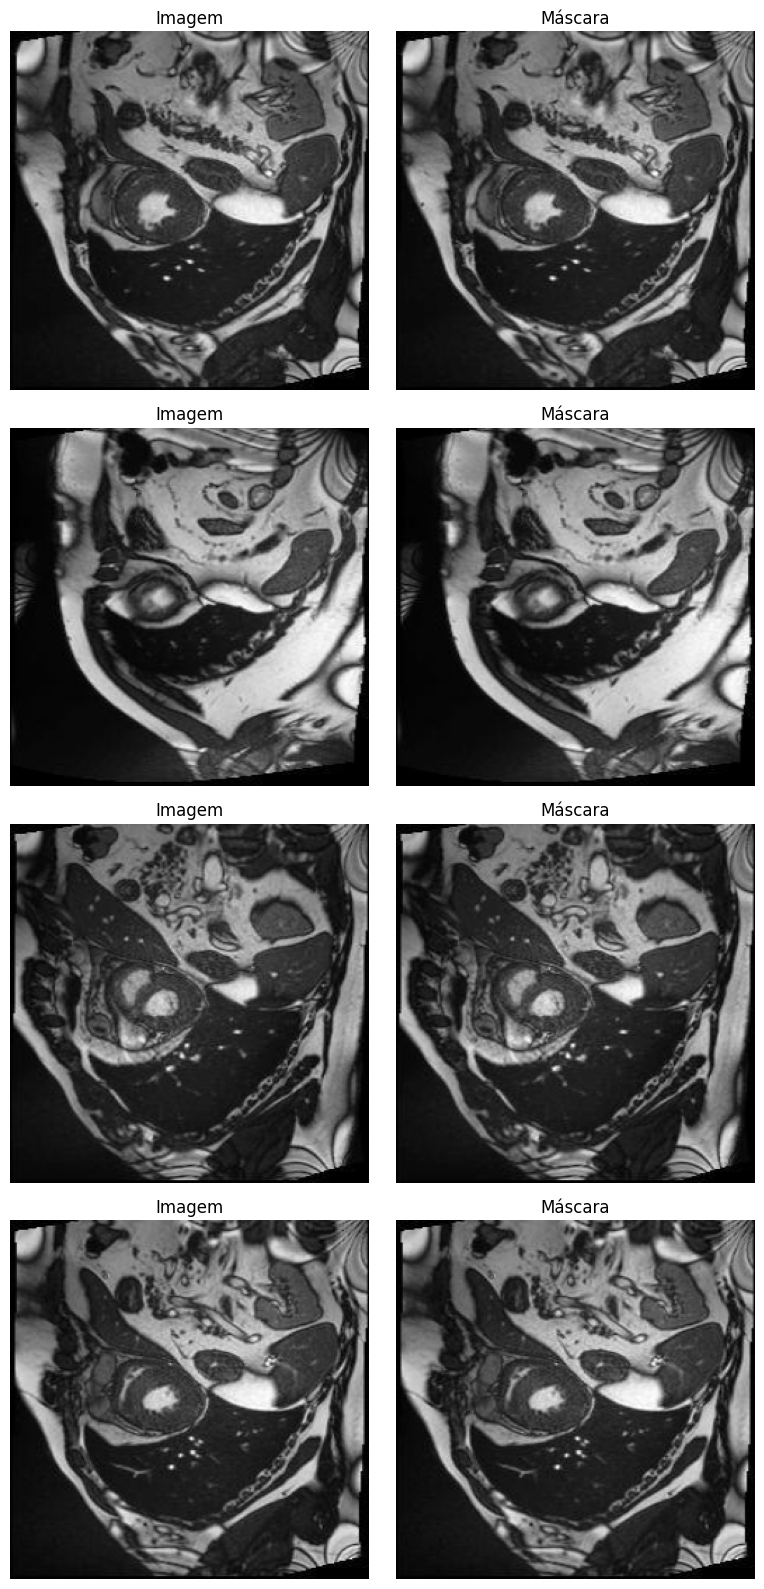

In [67]:
import os
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Caminho base do dataset de segmentação do coração
dataset_path = "/content/drive/MyDrive/DataSet"

# Função para criar as pastas, caso não existam
def criar_pastas_dataset():
    os.makedirs(os.path.join(dataset_path, "images"), exist_ok=True)
    os.makedirs(os.path.join(dataset_path, "masks"), exist_ok=True)
    print("Pastas 'images' e 'masks' verificadas/criadas com sucesso.")

# Chama a função para garantir que as pastas existam
criar_pastas_dataset()

# Define uma classe personalizada para o dataset
class HeartSegmentationDataset(Dataset):
    def __init__(self, images_dir, masks_dir, transform=None):
        self.images_dir = images_dir
        self.masks_dir = masks_dir
        self.transform = transform
        self.image_names = os.listdir(images_dir)  # lista de imagens

    def __len__(self):
        return len(self.image_names)

    def __getitem__(self, idx):
        # Carrega a imagem e a máscara usando o índice
        image_path = os.path.join(self.images_dir, self.image_names[idx])
        mask_path = os.path.join(self.masks_dir, self.image_names[idx])

        # Abre as imagens como objetos PIL
        image = Image.open(image_path).convert("RGB")
        mask = Image.open(mask_path).convert("L")  # Máscara em escala de cinza

        # Aplica as transformações, se houver
        if self.transform:
            image = self.transform(image)
            mask = self.transform(mask)

        return image, mask

# Define o caminho para as pastas de imagens e máscaras
images_dir = os.path.join(dataset_path, "images")
masks_dir = os.path.join(dataset_path, "masks")

# Transforma de exemplo (normalização e redimensionamento)
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])

# Cria o DataLoader
heart_dataset = HeartSegmentationDataset(images_dir=images_dir, masks_dir=masks_dir, transform=transform)
dataloader = DataLoader(heart_dataset, batch_size=4, shuffle=True)

# Função para exibir um batch de imagens e máscaras
def visualizar_batch(dataloader):
    images, masks = next(iter(dataloader))  # Obtem um batch
    batch_size = images.size(0)

    fig, axes = plt.subplots(batch_size, 2, figsize=(8, 4 * batch_size))
    for i in range(batch_size):
        # Converte a imagem e máscara para numpy para exibição
        image_np = images[i].permute(1, 2, 0).numpy()  # rearranja canais para [H, W, C]
        mask_np = masks[i].squeeze().numpy()           # remove dimensões extras

        # Exibe a imagem e a máscara
        axes[i, 0].imshow(image_np)
        axes[i, 0].set_title("Imagem")
        axes[i, 0].axis("off")

        axes[i, 1].imshow(mask_np, cmap="gray")
        axes[i, 1].set_title("Máscara")
        axes[i, 1].axis("off")

    plt.tight_layout()
    plt.show()

# Chama a função para exibir um batch de imagens e máscaras
visualizar_batch(dataloader)


In [65]:
import cv2
from glob import glob
from torch.utils.data import Dataset, DataLoader, Subset
from tqdm import tqdm
import albumentations as A
from albumentations.pytorch import ToTensorV2
import matplotlib.pyplot as plt

# arquivo data.py
class Data(Dataset):
    def __init__(self, image_dir: str, split: str, transform=None) -> None:
        self.image_dir = image_dir
        self.split = split
        self.transform = transform
        self.images_paths = glob(f"{image_dir}/{split}/image/*.jpg")  # Exemplo, ajuste o caminho conforme necessário


    def __len__(self) -> int:
        return len(self.images)

    def __getitem__(self, idx: int) -> tuple:
        # Carregar imagem e rótulo, aplicar transformações
        #image_path = self.images[idx]

        # Carregar e processar image, mask conforme o necessário
        #return image, mask

        # Diretórios das imagens e das máscaras
        image_dir = '/content/drive/MyDrive/DataSet (1)/images'  # Atualize com o caminho para a pasta de imagens
        mask_dir = '/content/drive/MyDrive/DataSet (1)/masks'    # Atualize com o caminho para a pasta de máscaras

    def load_image_and_mask(idx):
        # Nome do arquivo da imagem
        image_name = f"imagem_{idx}.png"  # Ou outro padrão de nome de arquivo
        # Caminho completo da imagem e da máscara
        image_path = os.path.join(image_dir, image_name)
        mask_path = os.path.join(mask_dir, image_name)  # Assumindo que a máscara tem o mesmo nome da imagem

        # Carrega a imagem e a máscara
        image = cv2.imread(image_path)
        mask = cv2.imread(mask_path)

        return image, mask


class Dataloader:
    def __init__(self, batch_size: int, shuffle: bool, size: int, subset: int = 0, description: bool = False) -> None:
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.size = size
        self.subset = subset
        self.description = description

    def compose(self):
        return A.Compose([
            A.Resize(self.size, self.size),
            A.Normalize(),
            ToTensorV2()
        ])

    def get_dataloader(self, split: str) -> DataLoader:
        dataset = Data(image_dir="path/to/images", split=split, transform=self.compose())
        return DataLoader(dataset, batch_size=self.batch_size, shuffle=self.shuffle)

    def get_train_dataloader(self) -> DataLoader:
        return self.get_dataloader('train')

    def get_val_dataloader(self) -> DataLoader:
        return self.get_dataloader('val')

    def get_test_dataloader(self) -> DataLoader:
        return self.get_dataloader('test')

# arquivo main.py
if __name__ == '__main__':
    dataloader = Dataloader(batch_size=2, size=512, shuffle=True, description=True)

    train_dataloader = dataloader.get_train_dataloader()

    EPOCHS = 10
    for epoch in range(EPOCHS):
        for image, mask in train_dataloader:
            image = image.detach().cpu().numpy()[0].transpose(1, 2, 0)
            mask = mask.detach().cpu().numpy()[0]
            plt.imshow(image)
            plt.show()
            plt.imshow(mask, cmap='gray')
            plt.show()
            # if cv2.waitKey(1) == ord('q'):
            #     break

AttributeError: 'Data' object has no attribute 'images'

In [66]:
import os
import cv2
from glob import glob
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm
import albumentations as A
from albumentations.pytorch import ToTensorV2
import matplotlib.pyplot as plt

# Arquivo data.py
class Data(Dataset):
    def __init__(self, image_dir: str, split: str, transform=None) -> None:
        self.image_dir = image_dir
        self.split = split
        self.transform = transform
        self.images_paths = glob(f"{image_dir}/{split}/images/*.jpg")  # Ajuste o caminho conforme necessário
        self.masks_paths = [p.replace('/images/', '/masks/') for p in self.images_paths]

        # Verificação para garantir que as listas de imagens e máscaras foram preenchidas corretamente
        if not self.images_paths:
            raise ValueError(f"Nenhuma imagem encontrada no diretório: {self.image_dir}/{self.split}/images")
        if not self.masks_paths:
            raise ValueError(f"Nenhuma máscara encontrada no diretório: {self.image_dir}/{self.split}/masks")

    def __len__(self) -> int:
        return len(self.images_paths)

    def __getitem__(self, idx: int) -> tuple:
        # Caminho da imagem e da máscara
        image_path = self.images_paths[idx]
        mask_path = self.masks_paths[idx]

        # Carrega a imagem e a máscara
        image = cv2.imread(image_path)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

        # Aplica transformações, se existirem
        if self.transform:
            transformed = self.transform(image=image, mask=mask)
            image = transformed['image']
            mask = transformed['mask']

        return image, mask


class Dataloader:
    def __init__(self, batch_size: int, shuffle: bool, size: int, subset: int = 0, description: bool = False) -> None:
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.size = size
        self.subset = subset
        self.description = description

    def compose(self):
        return A.Compose([
            A.Resize(self.size, self.size),
            A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),  # Normalização padrão
            ToTensorV2()
        ])

    def get_dataloader(self, split: str) -> DataLoader:
        dataset = Data(image_dir="/content/drive/MyDrive/DataSet", split=split, transform=self.compose())

        # Verificação para garantir que o dataset não está vazio
        if len(dataset) == 0:
            raise ValueError(f"O dataset '{split}' está vazio. Verifique o caminho e a estrutura das pastas.")

        return DataLoader(dataset, batch_size=self.batch_size, shuffle=self.shuffle)

    def get_train_dataloader(self) -> DataLoader:
        return self.get_dataloader('train')

    def get_val_dataloader(self) -> DataLoader:
        return self.get_dataloader('val')

    def get_test_dataloader(self) -> DataLoader:
        return self.get_dataloader('test')


# Arquivo main.py
if __name__ == '__main__':
    dataloader = Dataloader(batch_size=2, size=512, shuffle=True, description=True)

    # Verificação inicial do DataLoader
    try:
        train_dataloader = dataloader.get_train_dataloader()
        print("DataLoader de treino criado com sucesso.")
    except ValueError as e:
        print(e)
        train_dataloader = None

    # Prossiga apenas se o DataLoader foi carregado
    if train_dataloader:
        EPOCHS = 10
        for epoch in range(EPOCHS):
            for image, mask in train_dataloader:
                image = image.detach().cpu().numpy()[0].transpose(1, 2, 0)
                mask = mask.detach().cpu().numpy()[0]
                plt.imshow(image)
                plt.show()
                plt.imshow(mask, cmap='gray')
                plt.show()


Nenhuma imagem encontrada no diretório: /content/drive/MyDrive/DataSet/train/images


In [53]:
import os
import cv2
from glob import glob
from torch.utils.data import Dataset, DataLoader
import albumentations as A
from albumentations.pytorch import ToTensorV2
import matplotlib.pyplot as plt

# Arquivo data.py
class Data(Dataset):
    def __init__(self, image_dir: str, split: str, transform=None) -> None:
        self.image_dir = image_dir
        self.split = split
        self.transform = transform
        self.images_paths = glob(f"{image_dir}/{split}/images/*.jpg")  # Ajuste para o formato de imagem correto
        self.masks_paths = [p.replace('/images/', '/masks/') for p in self.images_paths]

        # Verificação para garantir que as listas de imagens e máscaras foram preenchidas corretamente
        if not self.images_paths:
            raise ValueError(f"Nenhuma imagem encontrada no diretório: {self.image_dir}/{self.split}/images")
        if not self.masks_paths:
            raise ValueError(f"Nenhuma máscara encontrada no diretório: {self.image_dir}/{self.split}/masks")

    def __len__(self) -> int:
        return len(self.images_paths)

    def __getitem__(self, idx: int) -> tuple:
        # Caminho da imagem e da máscara
        image_path = self.images_paths[idx]
        mask_path = self.masks_paths[idx]

        # Carrega a imagem e a máscara
        image = cv2.imread(image_path)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

        # Aplica transformações, se existirem
        if self.transform:
            transformed = self.transform(image=image, mask=mask)
            image = transformed['image']
            mask = transformed['mask']

        return image, mask


class Dataloader:
    def __init__(self, batch_size: int, shuffle: bool, size: int, subset: int = 0, description: bool = False) -> None:
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.size = size
        self.subset = subset
        self.description = description

    def compose(self):
        return A.Compose([
            A.Resize(self.size, self.size),
            A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),  # Normalização padrão
            ToTensorV2()
        ])

    def get_dataloader(self, split: str) -> DataLoader:
        dataset = Data(image_dir="/content/drive/MyDrive/DataSet", split=split, transform=self.compose())

        # Verificação para garantir que o dataset não está vazio
        if len(dataset) == 0:
            raise ValueError(f"O dataset '{split}' está vazio. Verifique o caminho e a estrutura das pastas.")

        return DataLoader(dataset, batch_size=self.batch_size, shuffle=self.shuffle)

    def get_train_dataloader(self) -> DataLoader:
        return self.get_dataloader('train')

    def get_val_dataloader(self) -> DataLoader:
        return self.get_dataloader('val')

    def get_test_dataloader(self) -> DataLoader:
        return self.get_dataloader('test')


# Arquivo main.py
if __name__ == '__main__':
    dataloader = Dataloader(batch_size=2, size=512, shuffle=True, description=True)

    # Verificação inicial do DataLoader
    try:
        train_dataloader = dataloader.get_train_dataloader()
        print("DataLoader de treino criado com sucesso.")
    except ValueError as e:
        print(e)
        train_dataloader = None

    # Prossiga apenas se o DataLoader foi carregado
    if train_dataloader:
        EPOCHS = 10
        for epoch in range(EPOCHS):
            for image, mask in train_dataloader:
                image = image.detach().cpu().numpy()[0].transpose(1, 2, 0)
                mask = mask.detach().cpu().numpy()[0]
                plt.imshow(image)
                plt.show()
                plt.imshow(mask, cmap='gray')
                plt.show()


Nenhuma imagem encontrada no diretório: /content/drive/MyDrive/DataSet/train/images


In [68]:
import os
import cv2
from glob import glob
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm
import albumentations as A
from albumentations.pytorch import ToTensorV2
import matplotlib.pyplot as plt

# Arquivo data.py
class Data(Dataset):
    def __init__(self, image_dir: str, split: str, transform=None) -> None:
        self.image_dir = image_dir
        self.split = split
        self.transform = transform
        self.images_paths = glob(f"{image_dir}/{split}/images/*.jpg")  # Ajuste o caminho conforme necessário
        self.masks_paths = [p.replace('/images/', '/masks/') for p in self.images_paths]

    def __len__(self) -> int:
        return len(self.images_paths)

    def __getitem__(self, idx: int) -> tuple:
        # Caminho da imagem e da máscara
        image_path = self.images_paths[idx]
        mask_path = self.masks_paths[idx]

        # Carrega a imagem e a máscara
        image = cv2.imread(image_path)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

        # Aplica transformações, se existirem
        if self.transform:
            transformed = self.transform(image=image, mask=mask)
            image = transformed['image']
            mask = transformed['mask']

        return image, mask


class Dataloader:
    def __init__(self, batch_size: int, shuffle: bool, size: int, subset: int = 0, description: bool = False) -> None:
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.size = size
        self.subset = subset
        self.description = description

    def compose(self):
        return A.Compose([
            A.Resize(self.size, self.size),
            A.Normalize(),
            ToTensorV2()
        ])

    def get_dataloader(self, split: str) -> DataLoader:
        dataset = Data(image_dir="/content/drive/MyDrive/DataSet", split=split, transform=self.compose())
        return DataLoader(dataset, batch_size=self.batch_size, shuffle=self.shuffle)

    def get_train_dataloader(self) -> DataLoader:
        return self.get_dataloader('train')

    def get_val_dataloader(self) -> DataLoader:
        return self.get_dataloader('val')

    def get_test_dataloader(self) -> DataLoader:
        return self.get_dataloader('test')


if __name__ == '__main__':
    dataloader = Dataloader(batch_size=2, size=512, shuffle=True, description=True)

    # Verificação inicial do DataLoader
    try:
        train_dataloader = dataloader.get_train_dataloader()
        print("DataLoader de treino criado com sucesso.")
    except ValueError as e:
        print(e)

    # Prossiga apenas se o DataLoader foi carregado
    if train_dataloader:
        EPOCHS = 10
        for epoch in range(EPOCHS):
            for image, mask in train_dataloader:
                image = image.detach().cpu().numpy()[0].transpose(1, 2, 0)
                mask = mask.detach().cpu().numpy()[0]
                plt.imshow(image)
                plt.show()
                plt.imshow(mask, cmap='gray')
                plt.show()


num_samples should be a positive integer value, but got num_samples=0


In [ ]:
import cv2
from glob import glob
from torch.utils.data import Dataset, DataLoader, Subset
from tqdm import tqdm
import albumentations as A
from albumentations.pytorch import ToTensorV2
import matplotlib.pyplot as plt


class Data(Dataset):
    def __init__(self, image_dir: str, split: str, transform=None) -> None:
        self.image_dir = image_dir
        self.split = split
        self.transform = transform
        self.images = glob(f"{image_dir}/{split}/image/*.jpg")  # Ajuste o caminho conforme necessário
        self.masks = glob(f"{image_dir}/{split}/masks/*.png")  # Ajuste o caminho conforme necessário para máscaras

    def __len__(self) -> int:
        return len(self.images)

    def __getitem__(self, idx: int) -> tuple:
        # Carregar imagem
        image_path = self.images[idx]
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Converter para RGB

        # Carregar máscara
        mask_path = self.masks[idx]  # Supondo que a máscara tenha o mesmo índice
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

        # Aplicar transformações
        if self.transform:
            augmented = self.transform(image=image, mask=mask)
            image = augmented['image']
            mask = augmented['mask']

        return image, mask

       if __name__ == '__main__':
            dataloader = Dataloader(batch_size=2, size=512, shuffle=True, description=True)


            train_dataloader = dataloader.get_train_dataloader()

    EPOCHS = 10
    for epoch in range(EPOCHS):
        for image, mask in train_dataloader:
            image = image.detach().cpu().numpy()[0].transpose(1, 2, 0)
            mask = mask.detach().cpu().numpy()[0]

            plt.figure(figsize=(12, 6))
            plt.subplot(1, 2, 1)
            plt.imshow(image)
            plt.axis('off')
            plt.title('Image')

            plt.subplot(1, 2, 2)
            plt.imshow(mask, cmap='gray')
            plt.axis('off')
            plt.title('Mask')
            plt.show()

            # Se quiser sair do loop com uma tecla, descomente as linhas abaixo
            # if cv2.waitKey(1) == ord('q'):
            #     break

In [76]:
import cv2
from glob import glob
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm
import albumentations as A
from albumentations.pytorch import ToTensorV2
import matplotlib.pyplot as plt


class Data(Dataset):
    def __init__(self, image_dir: str, split: str, transform=None) -> None:
        self.image_dir = image_dir
        self.split = split
        self.transform = transform
        self.images = glob(f"{image_dir}/{split}/image/*.jpg")  # Ajuste o caminho conforme necessário
        self.masks = glob(f"{image_dir}/{split}/masks/*.png")  # Ajuste o caminho conforme necessário para máscaras

        # Verificar se o número de imagens e máscaras coincide
        assert len(self.images) == len(self.masks), "O número de imagens deve ser igual ao número de máscaras."

    def __len__(self) -> int:
        return len(self.images)

    def __getitem__(self, idx: int) -> tuple:
        # Carregar imagem
        image_path = self.images[idx]
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Converter para RGB

        # Carregar máscara
        mask_path = self.masks[idx]  # Supondo que a máscara tenha o mesmo índice
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

        # Aplicar transformações
        if self.transform:
            augmented = self.transform(image=image, mask=mask)
            image = augmented['image']
            mask = augmented['mask']

        return image, mask


if __name__ == '__main__':
    # Defina as transformações conforme necessário
    transform = A.Compose([
        A.Resize(height=512, width=512),
        ToTensorV2()
    ])

    # Inicialize o dataset e o dataloader
    dataset = Data(image_dir='/content/drive/MyDrive/DataSet', split='treino', transform=transform)  # Ajuste o diretório
    dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

    EPOCHS = 10
    for epoch in range(EPOCHS):
        for images, masks in dataloader:
            # Converta para numpy e tranponha as dimensões
            images = images.detach().cpu().numpy()
            masks = masks.detach().cpu().numpy()

            # Exibir todas as imagens do lote
            num_images = images.shape[0]  # Número de imagens no lote
            plt.figure(figsize=(12, 6 * num_images))
            for i in range(num_images):
                plt.subplot(num_images, 2, i * 2 + 1)
                plt.imshow(images[i].transpose(1, 2, 0))  # Transpor para (H, W, C)
                plt.axis('off')
                plt.title(f'Image {i+1}')

                plt.subplot(num_images, 2, i * 2 + 2)
                plt.imshow(masks[i], cmap='gray')
                plt.axis('off')
                plt.title(f'Mask {i+1}')

            plt.show()

            # Se quiser sair do loop com uma tecla, descomente as linhas abaixo
            # if cv2.waitKey(1) == ord('q'):
            #     break


ValueError: num_samples should be a positive integer value, but got num_samples=0

In [ ]:
import os
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

class HeartDataset(Dataset):
    def __init__(self, image_dir, mask_dir, transform=None):
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.transform = transform
        self.image_files = sorted(os.listdir(image_dir))
        self.mask_files = sorted(os.listdir(mask_dir))

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        image_path = os.path.join(self.image_dir, self.image_files[idx])
        mask_path = os.path.join(self.mask_dir, self.mask_files[idx])

        image = Image.open(image_path).convert("RGB")
        mask = Image.open(mask_path).convert("L")

        if self.transform:
            image = self.transform(image)
            mask = self.transform(mask)

        return image, mask

transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

image_dir = '/content/drive/MyDrive/DataSet_coracao/images'
mask_dir = '/content/drive/MyDrive/DataSet_coracao/masks'

heart_dataset = HeartDataset(image_dir=image_dir, mask_dir=mask_dir, transform=transform)
dataloader = DataLoader(heart_dataset, batch_size=4, shuffle=True, num_workers=2)

for batch_idx, (images, masks) in enumerate(dataloader):
    print(f"Lote {batch_idx + 1}")
    print(f"Imagens: {images.size()}")
    print(f"Máscaras: {masks.size()}")


In [79]:
import cv2
from glob import glob
from torch.utils.data import Dataset, DataLoader, Subset
from tqdm import tqdm
import albumentations as A
from albumentations.pytorch import ToTensorV2
import matplotlib.pyplot as plt

# arquivo data.py
class Data(Dataset):
    def __init__(self, image_dir: str, split: str, transform=None) -> None:
        self.image_dir = image_dir
        self.split = split
        self.transform = transform
        self.images = glob(f"{image_dir}/{split}/images/*.jpg")  # Ajuste conforme o caminho correto
        self.masks = glob(f"{image_dir}/{split}/masks/*.jpj")  # Ajuste conforme o caminho correto

    def __len__(self) -> int:
        return len(self.images)

    def __getitem__(self, idx: int) -> tuple:
        image_path = self.images[idx]
        mask_path = self.masks[idx]

        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

        if self.transform:
            transformed = self.transform(image=image, mask=mask)
            image = transformed["image"]
            mask = transformed["mask"]

        return image, mask

class Dataloader:
    def __init__(self, batch_size: int, shuffle: bool, size: int, subset: int = 0, description: bool = False) -> None:
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.size = size
        self.subset = subset
        self.description = description

    def compose(self):
        return A.Compose([
            A.Resize(self.size, self.size),
            A.Normalize(),
            ToTensorV2()
        ])

    def get_dataloader(self, split: str) -> DataLoader:
        dataset = Data(image_dir="/content/drive/MyDrive/DataSet_coracaopath/to/images", split=split, transform=self.compose())

        # Usar apenas um subset, se especificado
        if self.subset > 0:
            indices = list(range(len(dataset)))
            subset_indices = indices[:self.subset]
            dataset = Subset(dataset, subset_indices)

        return DataLoader(dataset, batch_size=self.batch_size, shuffle=self.shuffle)

    def get_train_dataloader(self) -> DataLoader:
        return self.get_dataloader('train')

    def get_val_dataloader(self) -> DataLoader:
        return self.get_dataloader('val')

    def get_test_dataloader(self) -> DataLoader:
        return self.get_dataloader('test')

# arquivo main.py
if __name__ == '__main__':
    dataloader = Dataloader(batch_size=2, size=512, shuffle=True, description=True)

    train_dataloader = dataloader.get_train_dataloader()

    EPOCHS = 10
    for epoch in range(EPOCHS):
        for image, mask in train_dataloader:
            image_np = image.detach().cpu().numpy()[0].transpose(1, 2, 0)
            mask_np = mask.detach().cpu().numpy()[0]

            plt.figure(figsize=(10, 5))
            plt.subplot(1, 2, 1)
            plt.imshow(image_np)
            plt.title("Image")
            plt.axis('off')

            plt.subplot(1, 2, 2)
            plt.imshow(mask_np, cmap='gray')
            plt.title("Mask")
            plt.axis('off')

            plt.show()

ValueError: num_samples should be a positive integer value, but got num_samples=0

In [80]:
import cv2
from glob import glob
from torch.utils.data import Dataset, DataLoader, Subset
from tqdm import tqdm
import albumentations as A
from albumentations.pytorch import ToTensorV2
import matplotlib.pyplot as plt

# arquivo data.py
class Data(Dataset):
    def __init__(self, image_dir: str, split: str, transform=None) -> None:
        self.image_dir = image_dir
        self.split = split
        self.transform = transform
        self.images = sorted(glob(f"{image_dir}/{split}/images/*.jpg"))  # Ordenar para garantir correspondência
        self.masks = sorted(glob(f"{image_dir}/{split}/masks/*.png"))    # Ordenar para garantir correspondência

        # Verificação de correspondência
        if len(self.images) == 0:
            raise ValueError(f"Nenhuma imagem encontrada no diretório: {image_dir}/{split}/images/")
        if len(self.masks) == 0:
            raise ValueError(f"Nenhuma máscara encontrada no diretório: {image_dir}/{split}/masks/")
        if len(self.images) != len(self.masks):
            raise ValueError("O número de imagens e máscaras não corresponde.")

    def __len__(self) -> int:
        return len(self.images)

    def __getitem__(self, idx: int) -> tuple:
        image_path = self.images[idx]
        mask_path = self.masks[idx]

        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

        if self.transform:
            transformed = self.transform(image=image, mask=mask)
            image = transformed["image"]
            mask = transformed["mask"]

        return image, mask

class Dataloader:
    def __init__(self, batch_size: int, shuffle: bool, size: int, subset: int = 0, description: bool = False) -> None:
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.size = size
        self.subset = subset
        self.description = description

    def compose(self):
        return A.Compose([
            A.Resize(self.size, self.size),
            A.Normalize(),
            ToTensorV2()
        ])

    def get_dataloader(self, split: str) -> DataLoader:
        dataset = Data(image_dir="/content/drive/MyDrive/DataSet", split=split, transform=self.compose())

        # Usar apenas um subset, se especificado
        if self.subset > 0:
            indices = list(range(len(dataset)))
            subset_indices = indices[:self.subset]
            dataset = Subset(dataset, subset_indices)

        return DataLoader(dataset, batch_size=self.batch_size, shuffle=self.shuffle)

    def get_train_dataloader(self) -> DataLoader:
        return self.get_dataloader('train')

    def get_val_dataloader(self) -> DataLoader:
        return self.get_dataloader('val')

    def get_test_dataloader(self) -> DataLoader:
        return self.get_dataloader('test')

# arquivo main.py
if __name__ == '__main__':
    dataloader = Dataloader(batch_size=2, size=512, shuffle=True, description=True)

    train_dataloader = dataloader.get_train_dataloader()

    EPOCHS = 10
    for epoch in range(EPOCHS):
        for image, mask in train_dataloader:
            image_np = image.cpu().numpy()[0].transpose(1, 2, 0)
            mask_np = mask.cpu().numpy()[0]

            plt.figure(figsize=(10, 5))
            plt.subplot(1, 2, 1)
            plt.imshow(image_np)
            plt.title("Image")
            plt.axis('off')

            plt.subplot(1, 2, 2)
            plt.imshow(mask_np, cmap='gray')
            plt.title("Mask")
            plt.axis('off')

            plt.show()

ValueError: Nenhuma imagem encontrada no diretório: /content/drive/MyDrive/DataSet/train/images/

In [1]:
# arquivo data.py
import cv2
from glob import glob
from torch.utils.data import Dataset, DataLoader
import albumentations as A
from albumentations.pytorch import ToTensorV2

class Data(Dataset):
    def __init__(self, image_dir: str, split: str, transform=None) -> None:
        self.image_dir = image_dir
        self.split = split
        self.transform = transform
        self.images = glob(f"{image_dir}/{split}//content/drive/MyDrive/DataSet_coracao/images/*.jpg")  # Ajuste o caminho conforme necessário
        self.masks = glob(f"{image_dir}/{split}//content/drive/MyDrive/DataSet_coracao/masks/*.jpg")    # Ajuste o caminho conforme necessário

        # Verifique se temos a mesma quantidade de imagens e máscaras
        assert len(self.images) == len(self.masks), "Número de imagens e máscaras não corresponde"

    def __len__(self) -> int:
        return len(self.images)

    def __getitem__(self, idx: int) -> tuple:
        # Carregar imagem e máscara
        image_path = self.images[idx]
        mask_path = self.masks[idx]

        # Carregar a imagem e a máscara em escala de cinza (para o caso de máscaras)
        image = cv2.imread(image_path)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

        # Aplicar transformações, se especificadas
        if self.transform:
            augmented = self.transform(image=image, mask=mask)
            image = augmented['image']
            mask = augmented['mask']

        return image, mask

class Dataloader:
    def __init__(self, batch_size: int, shuffle: bool, size: int, subset: int = 0, description: bool = False) -> None:
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.size = size
        self.subset = subset
        self.description = description

    def compose(self):
        return A.Compose([
            A.Resize(self.size, self.size),
            A.Normalize(),
            ToTensorV2()
        ])

    def get_dataloader(self, split: str) -> DataLoader:
        dataset = Data(image_dir="path/to/images", split=split, transform=self.compose())
        if len(dataset) == 0:
            raise ValueError(f"O dataset {split} está vazio. Verifique o caminho das imagens e das máscaras.")
        return DataLoader(dataset, batch_size=self.batch_size, shuffle=self.shuffle)

    def get_train_dataloader(self) -> DataLoader:
        return self.get_dataloader('train')

    def get_val_dataloader(self) -> DataLoader:
        return self.get_dataloader('val')

    def get_test_dataloader(self) -> DataLoader:
        return self.get_dataloader('test')

# arquivo main.py
if __name__ == '__main__':
    dataloader = Dataloader(batch_size=2, size=512, shuffle=True, description=True)

    train_dataloader = dataloader.get_train_dataloader()

    EPOCHS = 10
    for epoch in range(EPOCHS):
        for image, mask in train_dataloader:
            image = image.detach().cpu().numpy()[0].transpose(1, 2, 0)
            mask = mask.detach().cpu().numpy()[0]
            plt.imshow(image)
            plt.show()
            plt.imshow(mask, cmap='gray')
            plt.show()

/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


ValueError: O dataset train está vazio. Verifique o caminho das imagens e das máscaras.

In [2]:
import os
import cv2
import matplotlib.pyplot as plt
from glob import glob

def display_images(image_dir, mask_dir, num_images=5):
    """Função para exibir imagens e máscaras correspondentes."""
    image_paths = sorted(glob(os.path.join(image_dir, "*.jpg")))[:num_images]
    mask_paths = sorted(glob(os.path.join(mask_dir, "*.png")))[:num_images]

    for img_path, mask_path in zip(image_paths, mask_paths):
        # Carregar imagem e máscara
        image = cv2.imread(img_path)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)  # Carregar em escala de cinza

        # Converter imagem para RGB
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Exibir imagem e máscara lado a lado
        plt.figure(figsize=(10, 5))

        plt.subplot(1, 2, 1)
        plt.imshow(image)
        plt.title("Imagem")
        plt.axis("off")

        plt.subplot(1, 2, 2)
        plt.imshow(mask, cmap="gray")
        plt.title("Máscara")
        plt.axis("off")

        plt.show()

# Caminhos para diretórios de treino, validação e teste
train_images_dir = "/content/drive/MyDrive/DataSet_coracao/images"
train_masks_dir = "/content/drive/MyDrive/DataSet_coracao/masks"

val_images_dir = "/content/drive/MyDrive/DataSet_coracao/images"
val_masks_dir = "/content/drive/MyDrive/DataSet_coracao/masks"

test_images_dir = "/content/drive/MyDrive/DataSet_coracao/images"
test_masks_dir = "/content/drive/MyDrive/DataSet_coracao/masks"

# Exibir imagens de treino
print("Treinamento:")
display_images(train_images_dir, train_masks_dir)

# Exibir imagens de validação
print("Validação:")
display_images(val_images_dir, val_masks_dir)

# Exibir imagens de teste
print("Teste:")
display_images(test_images_dir, test_masks_dir)

Treinamento:
Validação:
Teste:


In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
from glob import glob

def display_images(image_dir, mask_dir, num_images=5):
    """Função para exibir imagens e máscaras correspondentes com informações adicionais."""
    image_paths = sorted(glob(os.path.join(image_dir, "*.jpg")))[:num_images]
    mask_paths = sorted(glob(os.path.join(mask_dir, "*.png")))[:num_images]

    for img_path, mask_path in zip(image_paths, mask_paths):
        # Carregar imagem e máscara
        image = cv2.imread(img_path)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)  # Carregar em escala de cinza

        # Converter imagem para RGB
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Obter informações
        img_shape = image.shape
        mask_shape = mask.shape
        mask_pixels = cv2.countNonZero(mask)  # Conta os pixels diferentes de zero (assumindo que 0 seja fundo)

        # Exibir imagem e máscara lado a lado com informações
        plt.figure(figsize=(10, 5))

        plt.subplot(1, 2, 1)
        plt.imshow(image_rgb)
        plt.title(f"Imagem - Dimensões: {img_shape}")
        plt.axis("off")

        plt.subplot(1, 2, 2)
        plt.imshow(mask, cmap="gray")
        plt.title(f"Máscara - Dimensões: {mask_shape} | Pixels Máscara: {mask_pixels}")
        plt.axis("off")

        plt.show()

# Caminhos para diretórios de treino, validação e teste
train_images_dir = "/content/drive/MyDrive/patient103-frame01nii"
train_masks_dir = "/content/drive/MyDrive/patient110-4dnii"

val_images_dir = "/content/drive/MyDrive/patient103-frame01nii"
val_masks_dir = "/content/drive/MyDrive/patient110-4dnii"

test_images_dir = "/content/drive/MyDrive/patient103-frame01nii"
test_masks_dir = "/content/drive/MyDrive/patient110-4dnii"

# Exibir imagens de treino
print("Treinamento:")
display_images(train_images_dir, train_masks_dir)

# Exibir imagens de validação
print("Validação:")
display_images(val_images_dir, val_masks_dir)

# Exibir imagens de teste
print("Teste:")
display_images(test_images_dir, test_masks_dir)

Treinamento:
Validação:
Teste:


In [ ]:
import os
import cv2
import torch
from torch.utils.data import Dataset, DataLoader
from glob import glob
import matplotlib.pyplot as plt
import albumentations as A
from albumentations.pytorch import ToTensorV2

class Data(Dataset):
    def __init__(self, image_dir: str, mask_dir: str, transform=None):
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.transform = transform
        self.image_paths = sorted(glob(os.path.join(image_dir, "*.jpg")))
        self.mask_paths = sorted(glob(os.path.join(mask_dir, "*.png")))

        assert len(self.image_paths) == len(self.mask_paths), "O número de imagens e máscaras não coincide."

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx: int):
        image = cv2.imread(self.image_paths[idx])
        mask = cv2.imread(self.mask_paths[idx], cv2.IMREAD_GRAYSCALE)

        if self.transform:
            augmented = self.transform(image=image, mask=mask)
            image = augmented['image']
            mask = augmented['mask']

        return image, mask

class Dataloader:
    def __init__(self, batch_size: int, image_dir: str, mask_dir: str, shuffle: bool = True, transform=None):
        self.batch_size = batch_size
        self.dataset = Data(image_dir, mask_dir, transform)
        self.data_loader = DataLoader(self.dataset, batch_size=self.batch_size, shuffle=shuffle)

    def get_dataloader(self):
        return self.data_loader

# Função para exibir imagens e máscaras
def display_images(data_loader, num_images=5):
    for i, (images, masks) in enumerate(data_loader):
        if i >= num_images:  # Limitar o número de imagens exibidas
            break

        for j in range(images.size(0)):
            image = images[j].numpy().transpose(1, 2, 0)  # Transpor para formato HWC
            mask = masks[j].numpy()  # Converter máscara para numpy

            plt.figure(figsize=(10, 5))
            plt.subplot(1, 2, 1)
            plt.imshow(image)
            plt.title("Imagem")
            plt.axis("off")

            plt.subplot(1, 2, 2)
            plt.imshow(mask, cmap="gray")
            plt.title("Máscara")
            plt.axis("off")

            plt.show()

# Configurações
train_images_dir = "/content/drive/MyDrive/DataSet_coracao/images"
train_masks_dir = "/content/drive/MyDrive/DataSet_coracao/masks"

transform = A.Compose([
    A.Resize(256, 256),  # Redimensionar imagens
    ToTensorV2(),  # Converter para tensor PyTorch
])

# Criação do DataLoader
dataloader = Dataloader(batch_size=2, image_dir=train_images_dir, mask_dir=train_masks_dir, transform=transform)

# Exibir imagens e máscaras
display_images(dataloader.get_dataloader(), num_images=5)

In [5]:
import os
import cv2
import torch
from torch.utils.data import Dataset, DataLoader
from glob import glob
import matplotlib.pyplot as plt
import albumentations as A
from albumentations.pytorch import ToTensorV2

class Data(Dataset):
    def __init__(self, image_dir: str, mask_dir: str, transform=None):
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.transform = transform
        self.image_paths = sorted(glob(os.path.join(image_dir, "*.jpg")))  # Ajuste conforme a extensão correta
        self.mask_paths = sorted(glob(os.path.join(mask_dir, "*.png")))

        assert len(self.image_paths) == len(self.mask_paths), "O número de imagens e máscaras não coincide."

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx: int):
        image = cv2.imread(self.image_paths[idx])
        mask = cv2.imread(self.mask_paths[idx], cv2.IMREAD_GRAYSCALE)

        # Verifique se as imagens e máscaras foram lidas corretamente
        if image is None:
            raise ValueError(f"Imagem não encontrada: {self.image_paths[idx]}")
        if mask is None:
            raise ValueError(f"Máscara não encontrada: {self.mask_paths[idx]}")

        if self.transform:
            augmented = self.transform(image=image, mask=mask)
            image = augmented['image']
            mask = augmented['mask']

        return image, mask

class Dataloader:
    def __init__(self, batch_size: int, image_dir: str, mask_dir: str, shuffle: bool = True, transform=None):
        self.batch_size = batch_size
        self.dataset = Data(image_dir, mask_dir, transform)
        self.data_loader = DataLoader(self.dataset, batch_size=self.batch_size, shuffle=shuffle)

    def get_dataloader(self):
        return self.data_loader

# Função para exibir imagens e máscaras
def display_images(data_loader, num_images=5):
    for i, (images, masks) in enumerate(data_loader):
        if i >= num_images:  # Limitar o número de imagens exibidas
            break

        for j in range(images.size(0)):
            image = images[j].numpy().transpose(1, 2, 0)  # Transpor para formato HWC
            mask = masks[j].numpy()  # Converter máscara para numpy

            plt.figure(figsize=(10, 5))
            plt.subplot(1, 2, 1)
            plt.imshow(image)
            plt.title("Imagem")
            plt.axis("off")

            plt.subplot(1, 2, 2)
            plt.imshow(mask, cmap="gray")  # Exibir máscara em escala de cinza
            plt.title("Máscara")
            plt.axis("off")

            plt.show()

# Configurações
train_images_dir = "/content/drive/MyDrive/DataSet_coracao/images"
train_masks_dir = "/content/drive/MyDrive/DataSet_coracao/masks"

transform = A.Compose([
    A.Resize(256, 256),  # Redimensionar imagens
    ToTensorV2(),  # Converter para tensor PyTorch
])

# Criação do DataLoader
dataloader = Dataloader(batch_size=2, image_dir=train_images_dir, mask_dir=train_masks_dir, transform=transform)

# Exibir imagens e máscaras
display_images(dataloader.get_dataloader(), num_images=5)


AssertionError: O número de imagens e máscaras não coincide.